## ESERCIZIO DI GRUPPO 5 STELM spotify

https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

Nel file ci sono 24 colonne rispettivamente: 

1. track_name ->string Name of the song
2. artist(s)_name ->string Name of the artist(s) of the song
3. artist_count ->int[1-8] Number of artists contributing to the song
4. released_year ->int[1930-2023] Year when the song was released
5. released_month ->int[1-12] Month when the song was released
6. released_day ->int[1-31] Day of the month when the song was released
7. in_spotify_playlists ->int[31-52.9k] Number of Spotify playlists the song is included in
8. in_spotify_charts ->int[0-147] Presence and rank of the song on Spotify charts
9. streams ->? Total number of streams on Spotify
10. in_apple_playlists ->int[0-672] Number of Apple Music playlists the song is included in
11. in_apple_charts ->int Presence and rank of the song on Apple Music charts
12. in_deezer_playlists ->int Number of Deezer playlists the song is included in
13. in_deezer_charts ->int Presence and rank of the song on Deezer charts
14. in_shazam_charts ->int Presence and rank of the song on Shazam charts
15. bpm ->int Beats per minute, a measure of song tempo
16. key ->string Key of the song
17. mode ->string Mode of the song (major or minor)
18. danceability_% ->int Percentage indicating how suitable the song is for dancing
19. valence_% ->int Positivity of the song's musical content
20. energy_% ->int Perceived energy level of the song
21. acousticness_% ->int Amount of acoustic sound in the song
22. instrumentalness_% ->int Amount of instrumental content in the song
23. liveness_% ->int Presence of live performance elements
24. speechiness_% ->int Amount of spoken words in the song

### Potential Use Cases:

- Music analysis: Explore patterns in audio features to understand trends and preferences in popular songs.

- Platform comparison: Compare the song's popularity across different music platforms.

- Artist impact: Analyze how artist involvement and attributes relate to a song's success.

- Temporal trends: Identify any shifts in music attributes and preferences over time.

- Cross-platform presence: Investigate how songs perform across different streaming services.


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
file_path = "spotify_2023.csv"
sdf = pd.read_csv(file_path)

In [137]:
sdf.shape

(953, 24)

In [138]:
sdf["in_shazam_charts"] = sdf["in_shazam_charts"].str.replace(",", ".").astype(float)


In [139]:
duplicati = sdf[sdf.duplicated(subset=['track_name', 'artist(s)_name'], keep=False)]  # controllo righe duplicate 
duplicati

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,170,NaN,Major,56,53,64,11,0,45,6
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,94,G#,Major,73,65,79,5,2,11,6
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,166,C#,Major,70,57,57,9,20,11,7
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,121,A#,Minor,70,35,77,1,0,26,4
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,121,G#,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,170,NaN,Major,56,52,64,11,0,45,7


In [140]:
sdf.drop_duplicates(subset=['track_name', 'artist(s)_name'], inplace=True)

In [141]:
duplicati = sdf[sdf.duplicated(subset=['track_name', 'artist(s)_name'], keep=False)]  # RI-controllo righe duplicate 
duplicati

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [142]:
sdf.dropna(inplace=True)  # eliminazione righe con valori nulli 


In [143]:
sdf.reset_index(drop=True)   #Reset degli index, con drop=True eliminazione index Vecchi

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
810,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
811,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
812,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [144]:
sdf.shape

(814, 24)

1 - Distribuzione dei brani per anno di pubblicazione
 - Grafico a barre che mostra il numero di brani pubblicati per ogni anno (released_year).

<function matplotlib.pyplot.show(close=None, block=None)>

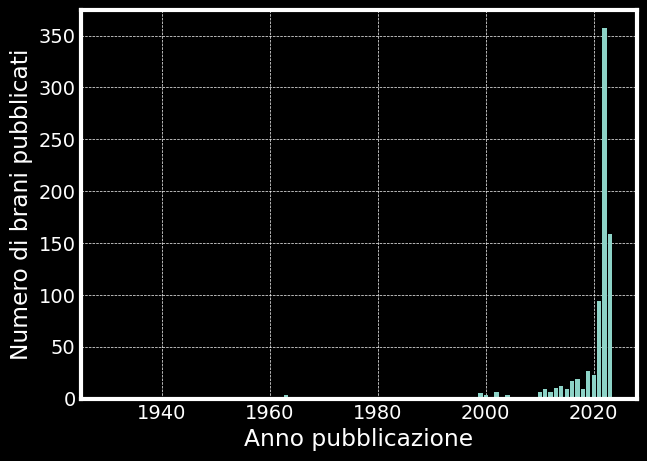

In [145]:
df = pd.DataFrame(sdf)
year_counts = df["released_year"].value_counts().sort_index()

plt.bar(year_counts.index, year_counts.values)
plt.xlabel("Anno pubblicazione")
plt.ylabel("Numero di brani pubblicati")
plt.show

6 - Brani in classifica
Grafico a barre che confronta il numero di brani presenti nelle classifiche di Spotify, Apple Music, Deezer e Shazam (in_spotify_charts, in_apple_charts, in_deezer_charts, in_shazam_charts).

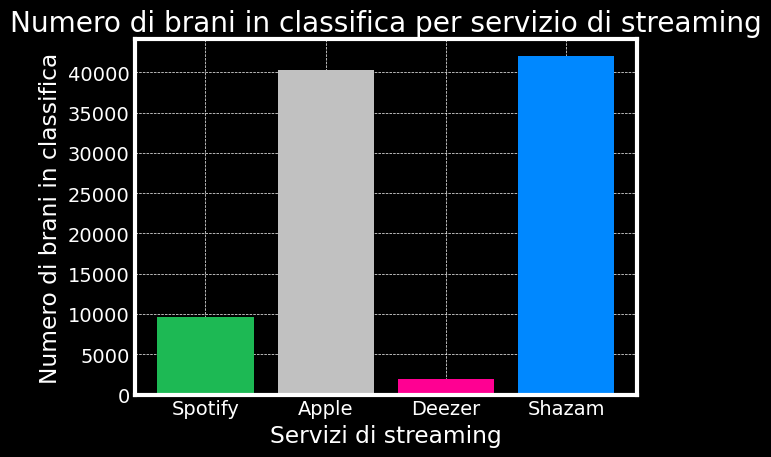

In [146]:


spotify_charts_count = df["in_spotify_charts"].astype(float).sum()  
apple_charts_count = df["in_apple_charts"].astype(float).sum()       
deezer_charts_count = df["in_deezer_charts"].astype(float).sum()     
shazam_charts_count = df["in_shazam_charts"].astype(float).sum()     


servizi = ["Spotify", "Apple", "Deezer", "Shazam"]
num_br = [spotify_charts_count, apple_charts_count, deezer_charts_count, shazam_charts_count]
colori = ["#1DB954", "#c1c1c1", "#ff0092", "#0088ff"]


tdf = pd.DataFrame({"servizi_str": servizi, "numero": num_br})


plt.bar(tdf["servizi_str"], tdf["numero"], color=colori)
plt.xlabel("Servizi di streaming")
plt.ylabel("Numero di brani in classifica")
plt.title("Numero di brani in classifica per servizio di streaming")
plt.tight_layout()
plt.show()

11 - Caratteristiche musicali principali
Grafico radar (fatto a torta perchè il radar non lo abbiamo visto) che rappresenta la media di danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_% e speechiness_% per i brani più popolari.

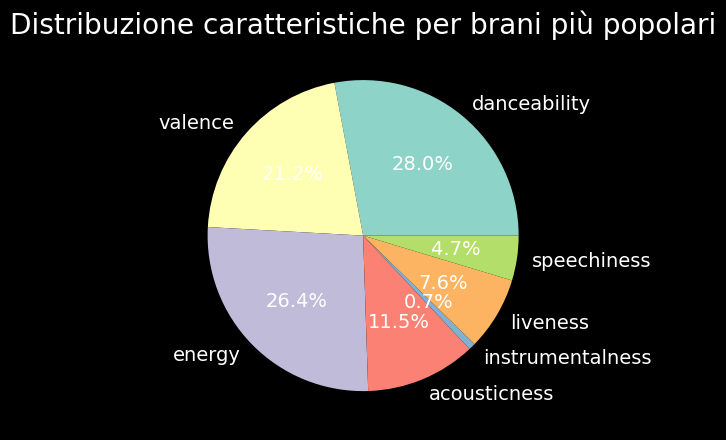

In [147]:
spotify_popular = df[df["in_spotify_charts"].astype(int) <= 10]
apple_popular = df[df["in_apple_charts"].astype(int) <= 10]      
deezer_popular = df[df["in_deezer_charts"].astype(float) <= 10]     
shazam_popular = df[df["in_shazam_charts"].astype(float) <= 10]

popular_df = pd.concat([spotify_popular, apple_popular, deezer_popular, shazam_popular])

attributi = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]
valori = [popular_df[i].astype(float).sum() for i in attributi]

labels = ["danceability", "valence", "energy", "acousticness", "instrumentalness", "liveness", "speechiness"]

plt.style.use('dark_background')
plt.pie(valori, labels=labels, autopct='%1.1f%%')
plt.title("Distribuzione caratteristiche per brani più popolari")
plt.show()

plt.savefig()

16 - Relazione tra la velocità di una canzone e gli streaming
 - Grafico a scatter

In [148]:
sdf["streams"] = sdf["streams"].astype(str).str.replace('BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3', '110').astype(float)

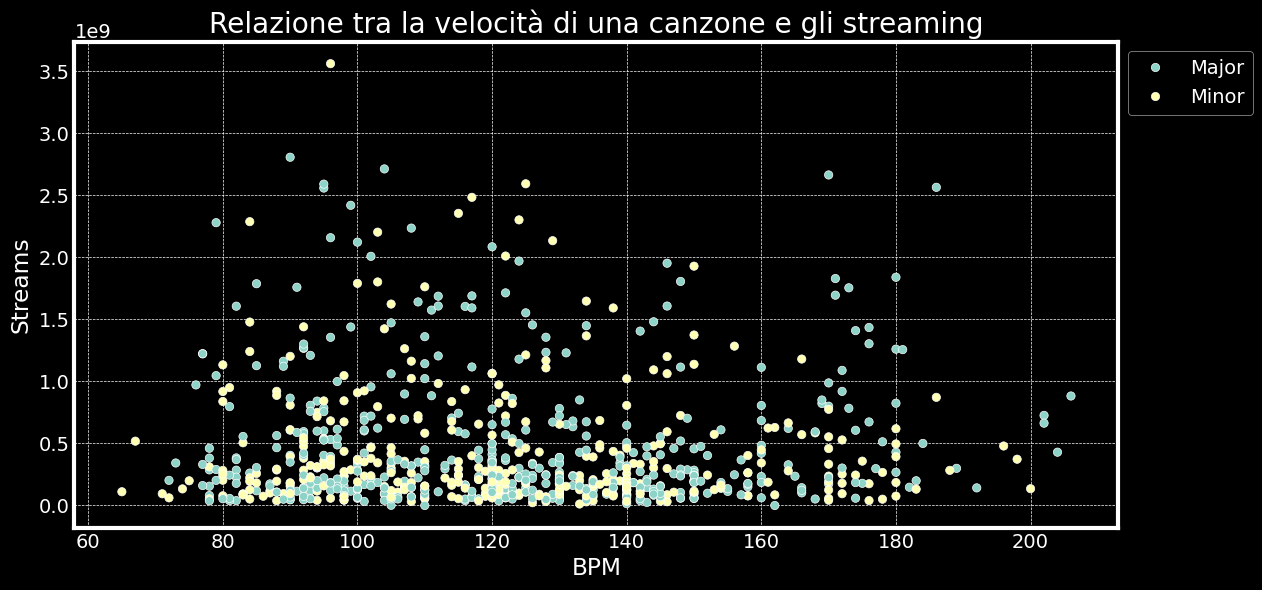

In [150]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="bpm", y="streams", hue="mode")
plt.title("Relazione tra la velocità di una canzone e gli streaming")
plt.xlabel("BPM")
plt.ylabel("Streams")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()
